# Context and Background

## Background & Context

Airbnb is an online platform that allows people to rent short term accommodation. This ranges from regular people with a spare bedroom to property management firms who lease multiple rentals. On the one side, Airbnb enables owners to list their space and earn rental money. On the other side, it provides travelers easy access to renting private homes.

Airbnb receives commissions from two sources upon every booking, namely from the hosts and guests. For every booking, Airbnb charges the guest 6-12% of the booking fee. Moreover, Airbnb charges the host 3% for every successful transaction.

As a senior data scientist at Airbnb, you have to come up with a pricing model that can effectively predict the Rent for an accommodation and can help hosts, travelers, and also the business in devising profitable strategies.

## Objective

<li>
Explore and visualize the dataset.</li>
<li>Build a linear regression model to predict the log of rental price.</li>
<li>Generate a set of insights and recommendations that will help the business.
</li>

## Data Dictionary 

1. id-	Property ID
2. room_type-	Type of Room in the property
3. accommodates	-How many adults can this property accomodate
4. bathrooms	-Number of bathrooms in the property
5. cancellation_policy	-Cancellation policy of the property
6. cleaning_fee-	This denotes whether the property's cleaning fee is included in the rent or not
7. instant_bookable-	It indicates whether an instant booking facility is available or not
8. review_scores_rating	-The review rating score of the property
9. bedrooms	-Number of bedrooms in the property
10. beds	-Total number of beds in the property
11. log_price -	Log of the rental price of the property for a fixed period 

## Problem definition, 


<li>Come up with a pricing model that can effectively predict the Rent for an accommodation </li>
<li>Help hosts, travelers, and also the business in devising profitable strategies</li>

## Question To ask

Which is the expensive room type in market
Which is the most widely used room type
Which room type is the least
how many are there which is instantly bookable
Which room type has the highest rating and the least rating
How many are there with max and min accomadation and which room type in them has the expensive and most affordable ones


# Starting to code

In [1]:

### Import necessary libraries.
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


### To enable plotting graphs in Jupyter notebook
%matplotlib inline

## defining the float format
#pd.set_option('float_format', '{:f}'.format)

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

## Loading the data

In this section the goals are to load the data into python and then to check its basic properties. This will include the dimension, column types and names, and missingness counts.

In [2]:
# Load the data into pandas dataframe and make a copy
path ='C:/Users/srajamani/Downloads/Python3-GL-Olympus/Supervised learning wk1/AirBNB_Dataset.csv'
df_copy=pd.read_csv(path)
df=df_copy.copy()

## Explore the data set

### Sample first few rows

In [3]:
df.head()

id        room_type  accommodates  bathrooms cancellation_policy  \
0   6901257  Entire home/apt           3.0        1.0              strict   
1   6304928  Entire home/apt           7.0        1.0              strict   
2   7919400  Entire home/apt           5.0        1.0            moderate   
3  13418779  Entire home/apt           4.0        1.0            flexible   
4   3808709  Entire home/apt           2.0        1.0            moderate   

  cleaning_fee instant_bookable  review_scores_rating  bedrooms  beds  \
0         True                f                 100.0       1.0   1.0   
1         True                t                  93.0       3.0   3.0   
2         True                t                  92.0       1.0   3.0   
3         True                f                   NaN       2.0   2.0   
4         True                t                  40.0       0.0   1.0   

   log_price  
0   5.010635  
1   5.129899  
2   4.976734  
3   6.620073  
4   4.744932

### Sample last few rows

In [4]:
df.tail()

id        room_type  accommodates  bathrooms cancellation_policy  \
74106  14549287     Private room           1.0        1.0            flexible   
74107  13281809  Entire home/apt           4.0        2.0            moderate   
74108  18688039  Entire home/apt           5.0        1.0            moderate   
74109  17045948  Entire home/apt           2.0        1.0              strict   
74110   3534845  Entire home/apt           4.0        1.0            moderate   

      cleaning_fee instant_bookable  review_scores_rating  bedrooms  beds  \
74106        False                f                   NaN       1.0   1.0   
74107         True                f                  93.0       2.0   4.0   
74108         True                t                  94.0       2.0   2.0   
74109         True                t                   NaN       0.0   2.0   
74110        False                f                  96.0       1.0   2.0   

       log_price  
74106   4.605170  
74107   5.043425  
74108   5.220356  
74109   5.273000  
74110   4.852030

### Shape of the data :no of rows and column

In [5]:
df.shape

(74111, 11)

In [6]:
### Inference :there are 74111 rows and 11 columns

### Finding info on the list of columns ans their datatype

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [8]:
#Inferences  are as below
### ID is in integer
### room_types,cancellation policy,instant bookable,cancelling fee in object
### accomadates,bathroom,reviewscore rating,bedroom,beds,logprice all in float

### Finding missing Value

In [9]:
df.isnull().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

###### we have the above missing value in each column

### Finding Unique values

In [10]:
df.nunique()

id                      74111
room_type                   3
accommodates               16
bathrooms                  17
cancellation_policy         3
cleaning_fee                2
instant_bookable            2
review_scores_rating       54
bedrooms                   11
beds                       18
log_price                 767
dtype: int64

# Exploratory Data analysis

## Visualise the missing value

###### The lines in white indicates the missing value in each column

In [11]:
#pip install missingno

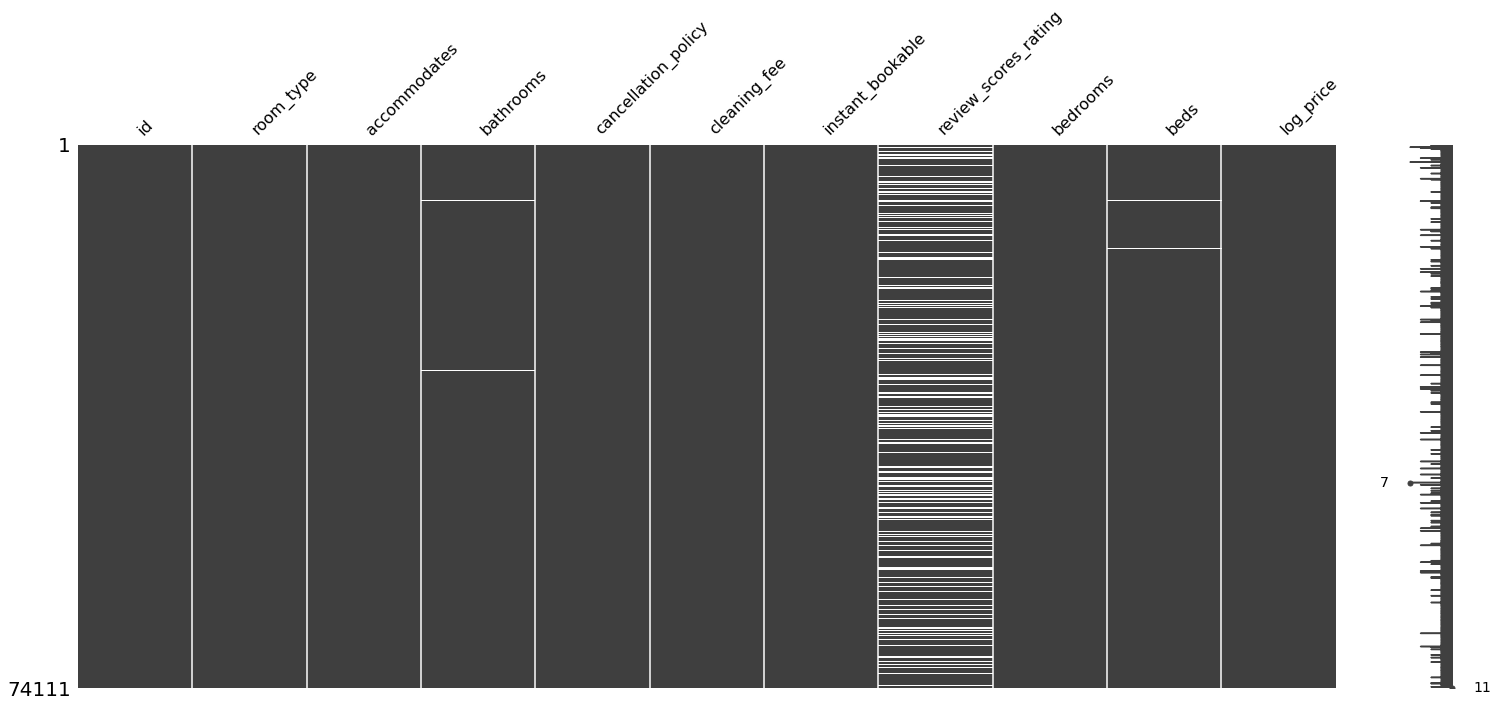

In [12]:
## Visualise the missing values
import missingno as msno
msno.matrix(df)


### Bar graph on the missing value

###### These bars show the values that are proportional to the non-missing data in the dataset. Along with that, the number of values missing is also shown

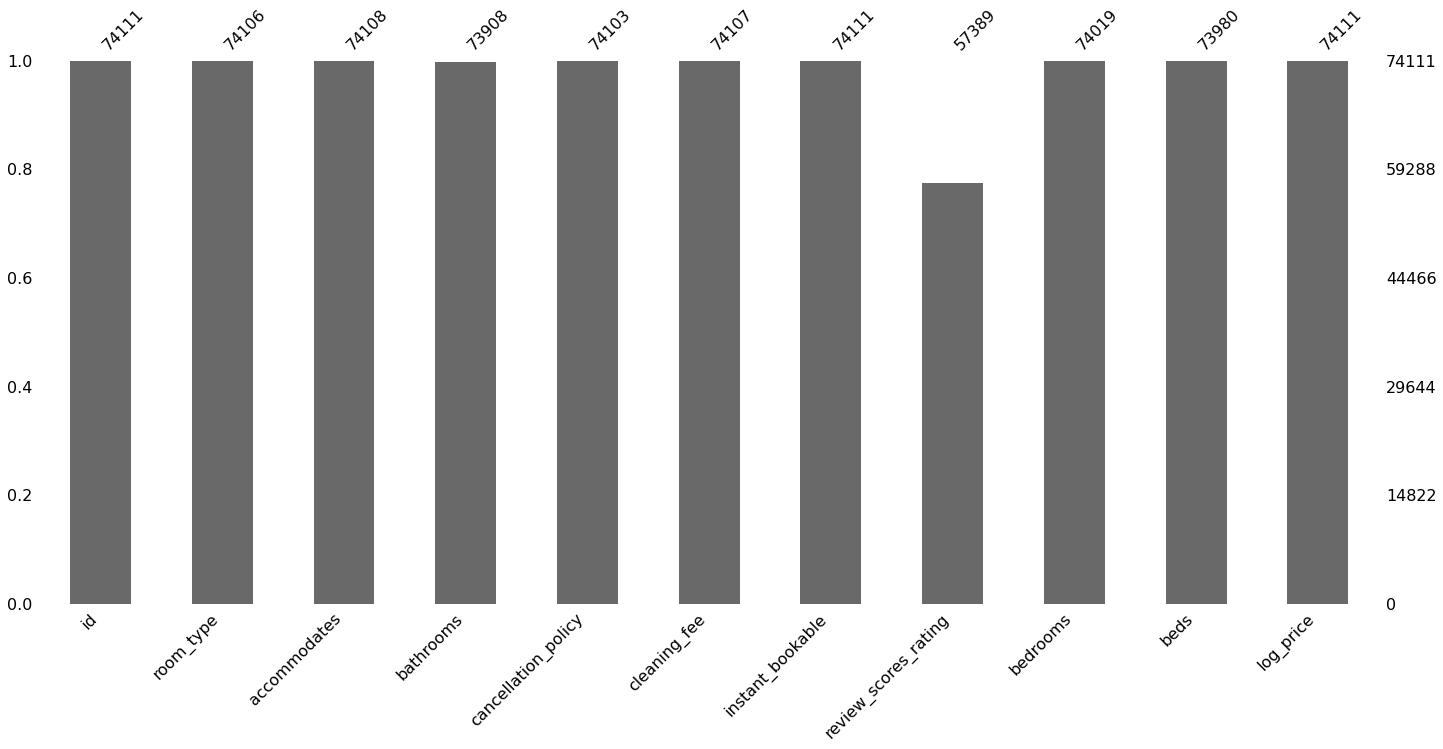

In [13]:
msno.bar(df)

### Heat map on Missing value

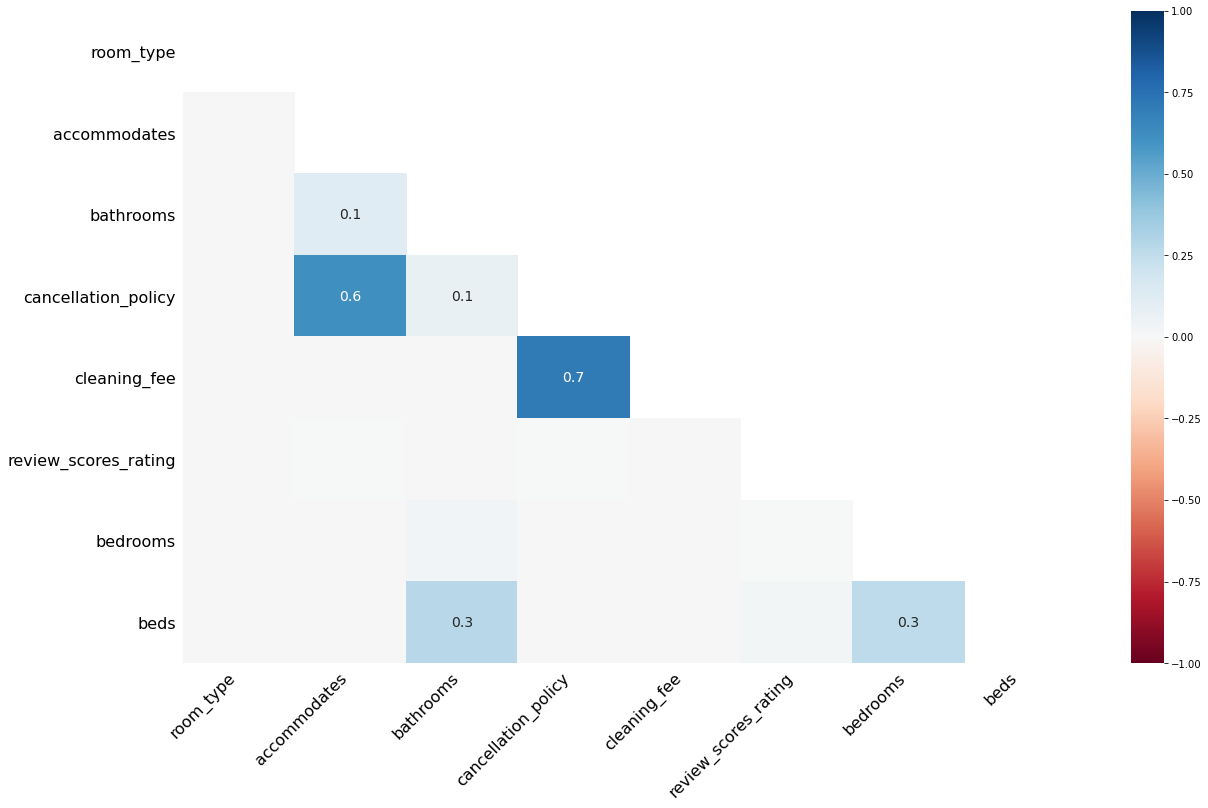

In [14]:
msno.heatmap(df)

## Fixing few data issue and changing the type from object to categorial

### Dropping all missing values

In [15]:
df=df.dropna(axis = 0)

In [16]:
df.shape

(57119, 11)

### Change from object to categorical value

In [17]:
df['room_type'] = df['room_type'].astype('category')
df['cancellation_policy'] = df['cancellation_policy'].astype('category')

df['cleaning_fee'] = df['cleaning_fee'].astype('category')
df['instant_bookable'] = df['instant_bookable'].astype('category')


##### The heatmap shows a positive correlation with blue. The darker the shade of blue, the more the correlation.

## EDA with Panda Profiling

In [18]:
!pip install pandas-profiling==2.8.0
data=pd.read_csv(path)
from pandas_profiling import ProfileReport

In [19]:
prof = ProfileReport(data)
# to view report created by pandas profile
prof

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Univariate analysis

### Analysing the categorical Variables

#### Room type 

In [20]:
df['room_type'].value_counts(dropna=False)


Entire home/apt    32894
Private room       22792
Shared room         1433
Name: room_type, dtype: int64

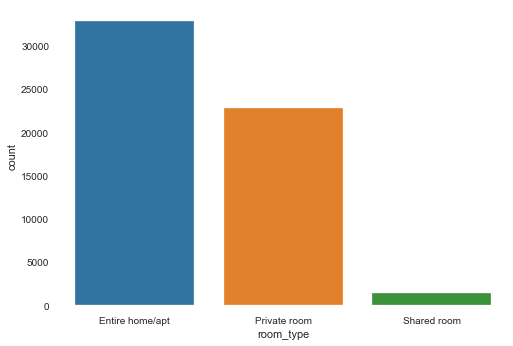

In [21]:
sns.countplot(df['room_type'])

#### Cancellaton Policy

In [22]:
df['cancellation_policy'].value_counts(dropna=False)

strict      27763
moderate    16428
flexible    12928
Name: cancellation_policy, dtype: int64

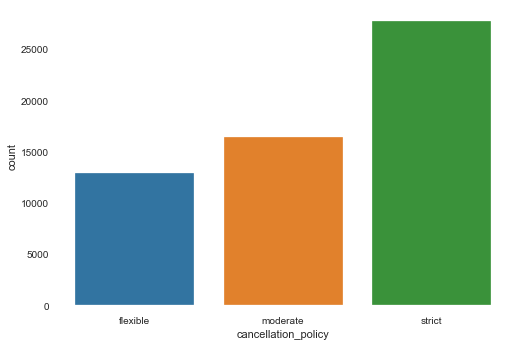

In [23]:
sns.countplot(df['cancellation_policy'])

###### we have most entry as strict cancellation and least is moderate 

###  Analysis of numerical variables- study their central tendency & dispersion.

In [24]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# write a function so it help us see boxplot and histogram for any input numerical value
# This function takes the numerical column as the input and returns the boxplots & histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

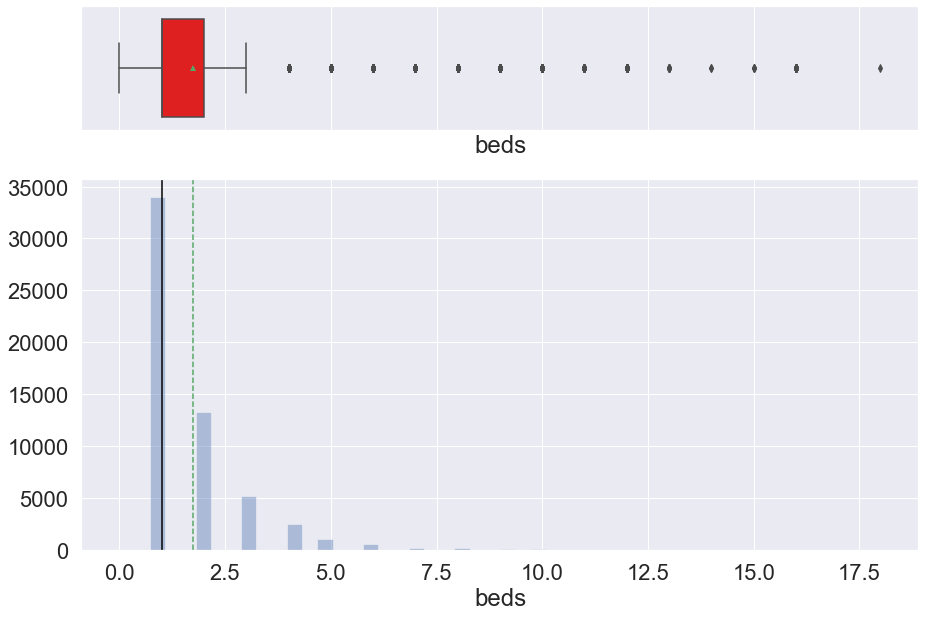

In [25]:
histogram_boxplot(df.beds)

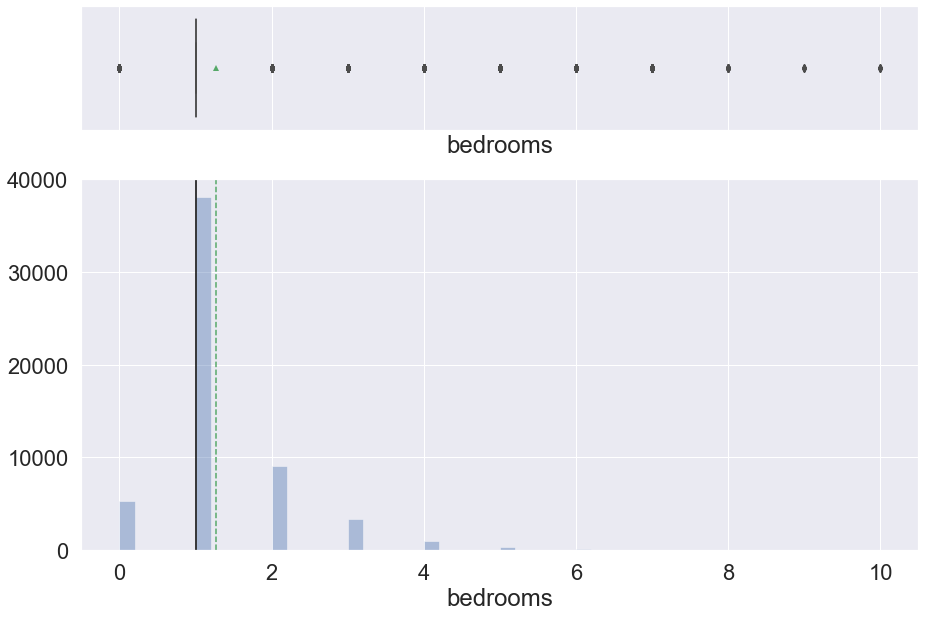

In [26]:
histogram_boxplot(df.bedrooms)

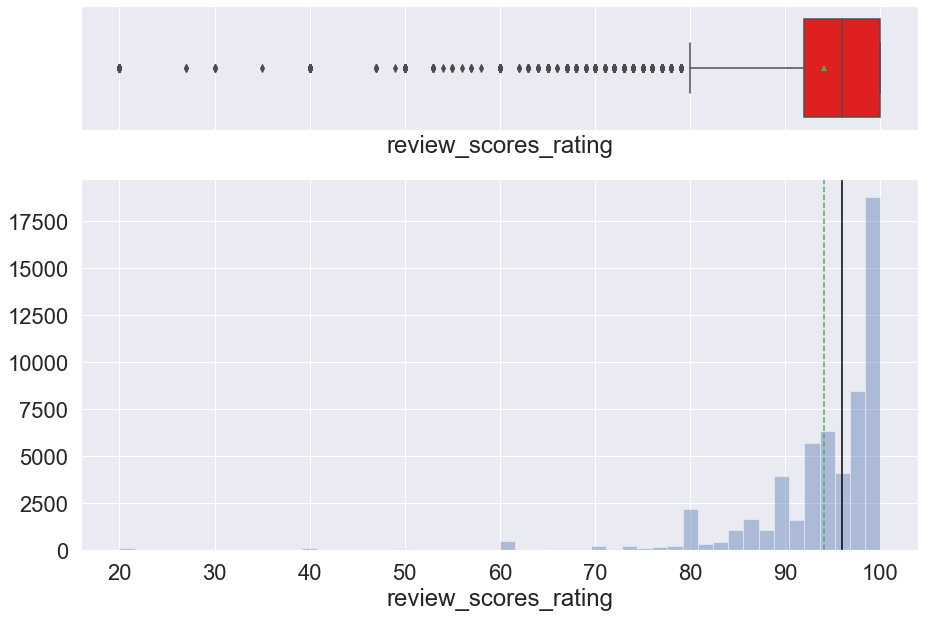

In [27]:
histogram_boxplot(df.review_scores_rating)

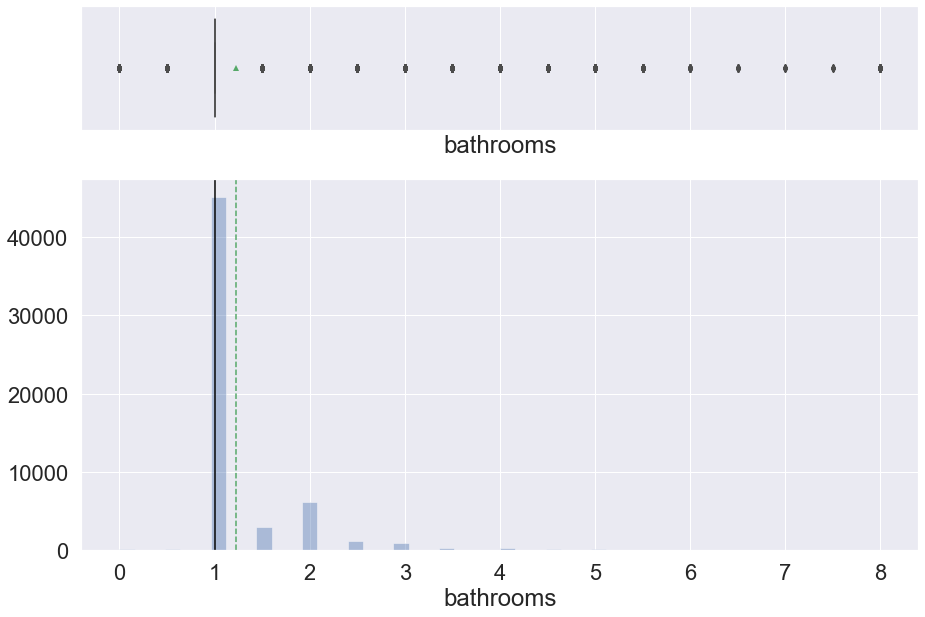

In [28]:
histogram_boxplot(df.bathrooms)

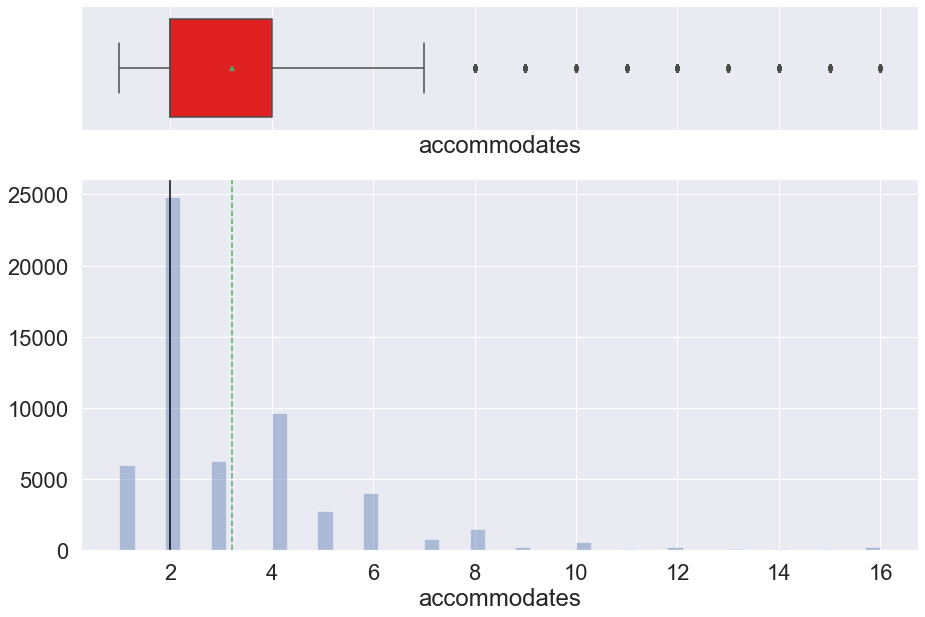

In [29]:
histogram_boxplot(df.accommodates)

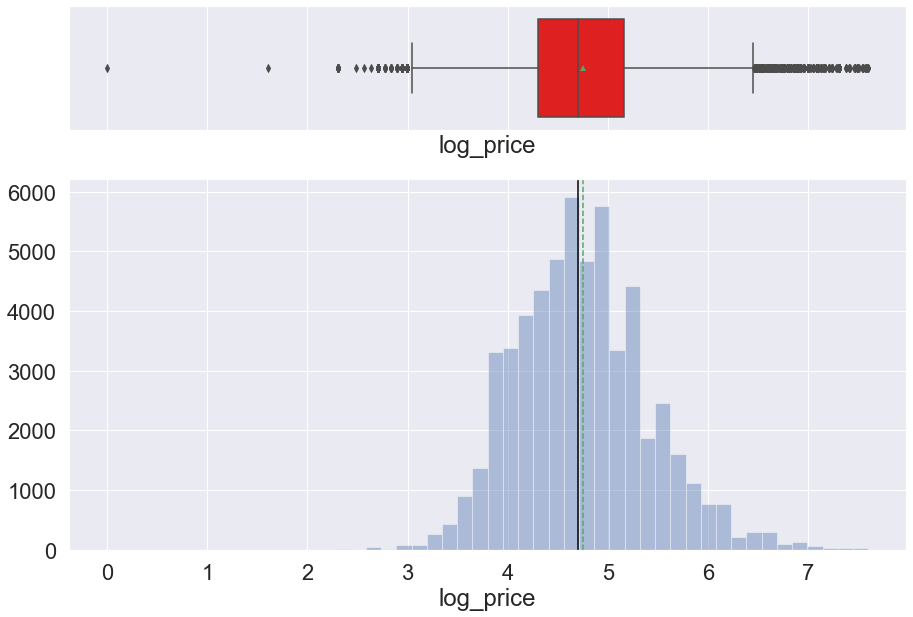

In [30]:
histogram_boxplot(df.log_price)

## Analyse all Numerical values in one shot

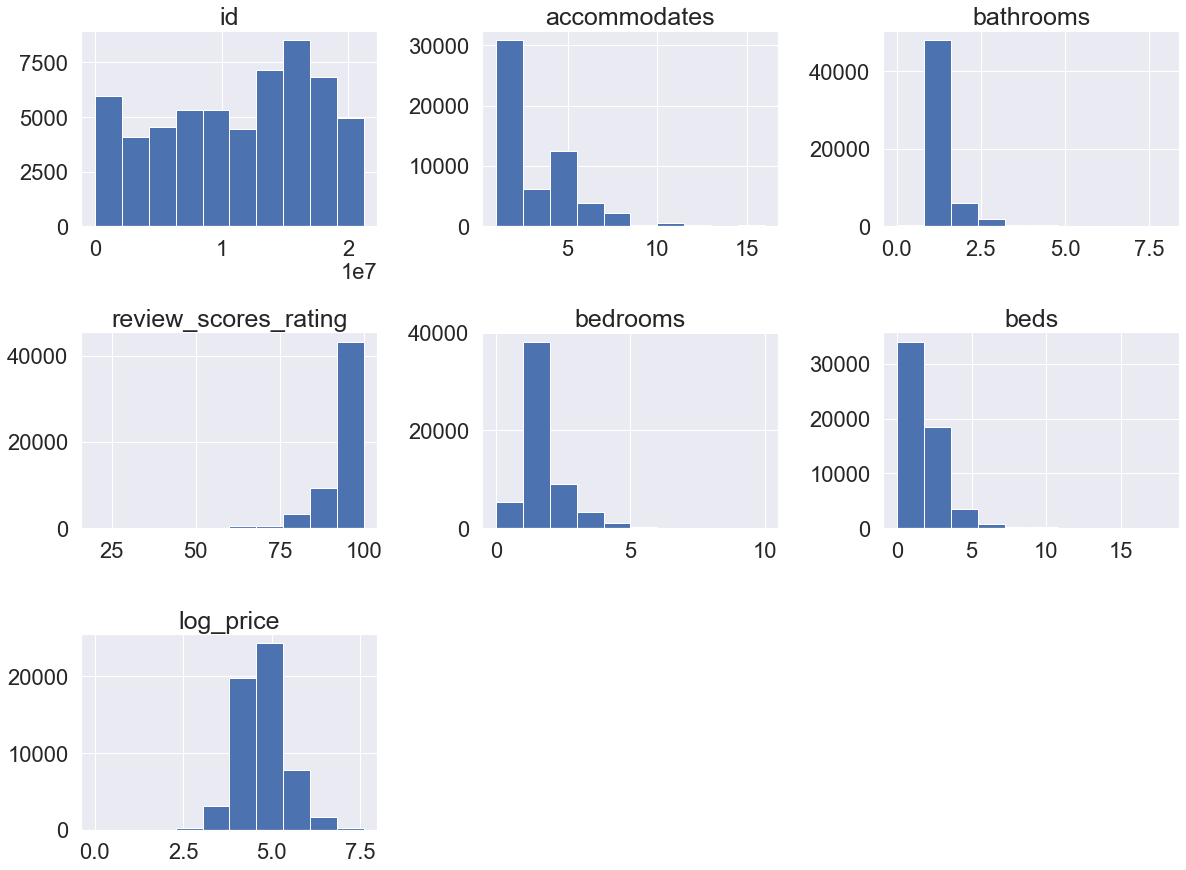

In [31]:
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()
#all_col.remove('id')
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

### Analysing Boolean Values

#### Instant bookable

In [32]:
df['instant_bookable'].value_counts(dropna=False)

f    41784
t    15335
Name: instant_bookable, dtype: int64

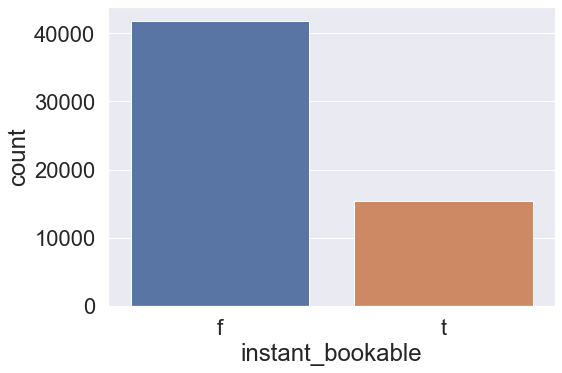

In [33]:
sns.countplot(df['instant_bookable'])

###### From the entries we see that most of them are not instantly bookable

#### Cleaning fee

In [34]:
df['cleaning_fee'].value_counts(dropna=False)

True     45404
False    11715
Name: cleaning_fee, dtype: int64

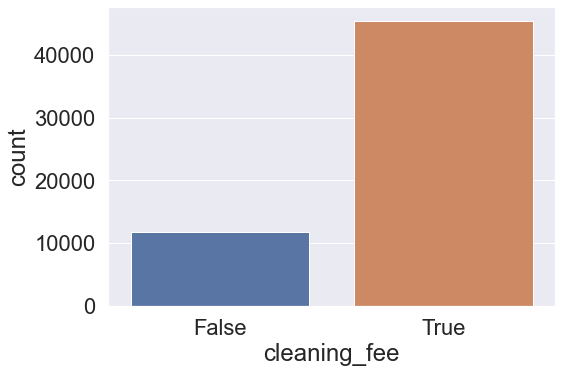

In [35]:
sns.countplot(df['cleaning_fee'])

###### Most of them seem to have a cleaning fee

### Analysing the Numerical variable

#### Review score

In [36]:
df['review_scores_rating'].value_counts(dropna=False)

100.0    16161
98.0      4350
97.0      4073
96.0      4066
95.0      3697
93.0      3630
90.0      2836
99.0      2621
94.0      2606
80.0      2149
92.0      2051
91.0      1608
87.0      1112
89.0      1107
88.0      1052
85.0       618
86.0       510
60.0       442
84.0       435
83.0       397
82.0       209
70.0       195
73.0       156
81.0       125
75.0        98
20.0        96
78.0        93
40.0        89
79.0        83
76.0        75
77.0        74
67.0        66
74.0        38
72.0        38
50.0        30
65.0        27
68.0        20
71.0        14
69.0        13
63.0        11
53.0        10
64.0        10
47.0         5
30.0         4
66.0         3
62.0         3
55.0         3
57.0         3
27.0         2
58.0         1
56.0         1
49.0         1
54.0         1
35.0         1
Name: review_scores_rating, dtype: int64

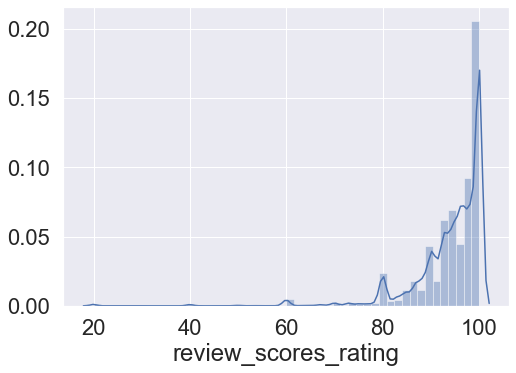

In [37]:
sns.distplot(df['review_scores_rating'])

##### The graph is left skewed  and have most missing value in this column

#### Beds

In [38]:
df['beds'].value_counts(dropna=False)

1.0     34016
2.0     13301
3.0      5213
4.0      2453
5.0      1052
6.0       532
7.0       183
8.0       153
10.0       69
9.0        61
12.0       26
16.0       23
11.0       20
13.0        9
15.0        4
14.0        2
0.0         1
18.0        1
Name: beds, dtype: int64

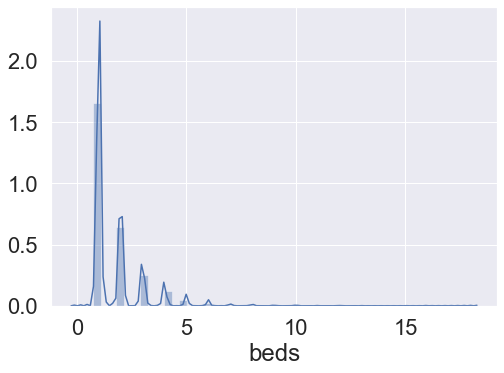

In [39]:
sns.distplot(df['beds'])

#### Bedrooms

In [40]:
df['bedrooms'].value_counts(dropna=False)

1.0     38129
2.0      9000
0.0      5318
3.0      3317
4.0       983
5.0       257
6.0        63
7.0        31
8.0        12
10.0        5
9.0         4
Name: bedrooms, dtype: int64

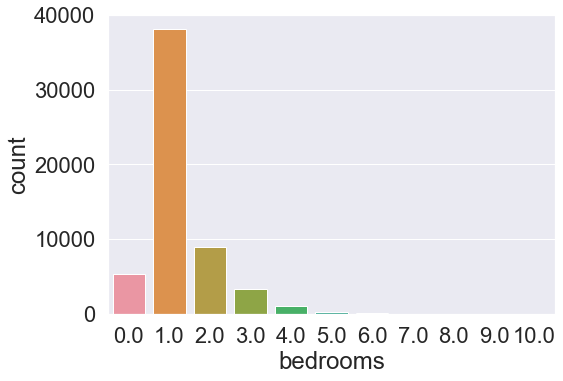

In [41]:
sns.countplot(df['bedrooms'])

In [42]:
df['accommodates'].value_counts(dropna=False)

2.0     24834
4.0      9654
3.0      6270
1.0      6001
6.0      3961
5.0      2745
8.0      1445
7.0       783
10.0      563
9.0       216
16.0      215
12.0      206
14.0       90
11.0       68
15.0       39
13.0       29
Name: accommodates, dtype: int64

# Finding the Exp  value for the log price

In [43]:
df['price'] = np.exp(df['log_price'])

In [44]:
df['price'].value_counts(dropna=False)

150.0     1978
100.0     1899
75.0      1502
50.0      1356
99.0      1343
          ... 
502.0        1
1002.0       1
1820.0       1
760.0        1
1.0          1
Name: price, Length: 668, dtype: int64

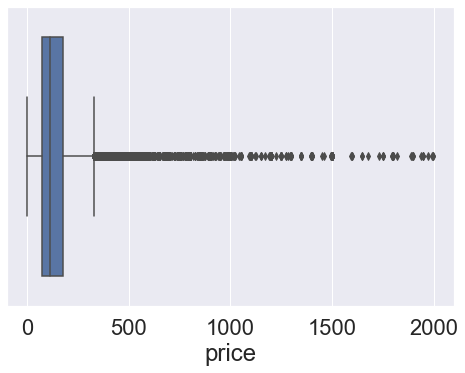

In [45]:
sns.boxplot(df['price'])

### Analysing no of units below 100 and over 300 and inbetween

In [46]:
# can add custom labels
df['PriceRange'] = pd.cut(
    df['price'], [-np.inf, 100, 200, 300, np.inf], 
    labels = ["<100", "100-200" ,"200-300",">300"]
)
#df.drop(['Height'], axis=1, inplace=True)
df['PriceRange'].value_counts(dropna=False)

<100       24888
100-200    21095
200-300     6539
>300        4597
Name: PriceRange, dtype: int64

# Bivariate analysis

#### Analysing Bedrooms and Beds 

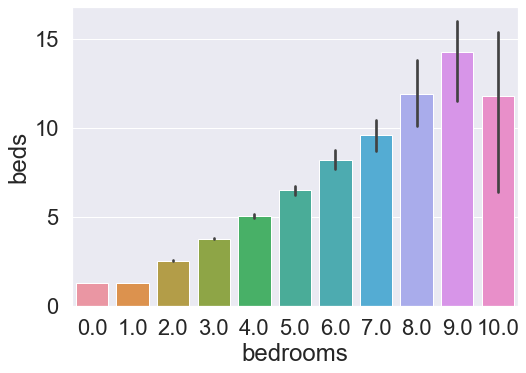

In [47]:
sns.barplot(x=df['bedrooms'],y=df['beds'])

plt.figure(figsize=(15,5))
sns.set(font_scale=2)
sns.barplot(data=df,x='Product',y='Age',hue='Gender')
plt.show()

#### Analyse the log price for different room type and instant bookable

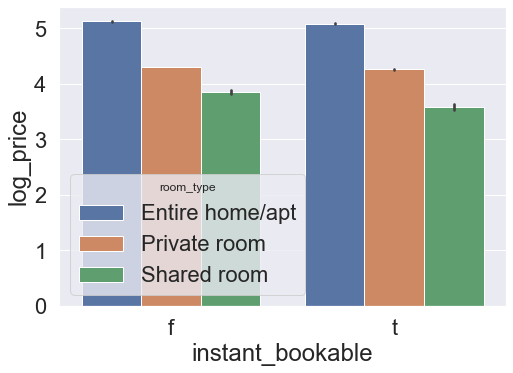

In [48]:
#plt.figure(figsize=(15,10))
#sns.set(font_scale=2)
sns.barplot(data=df,x='instant_bookable',y='log_price',hue='room_type')
plt.show()

#### Analysing roomtype and accomadates

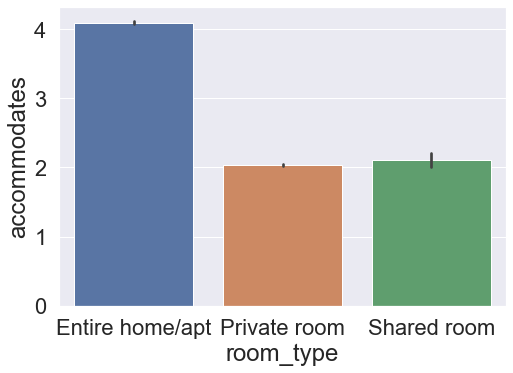

In [49]:
#plt.figure(figsize=(15,10))
sns.set(font_scale=2)
sns.barplot(data=df,x='room_type',y='accommodates')
plt.show()

####  Analysing exp_log_price and roomtype if they are instantly bookable

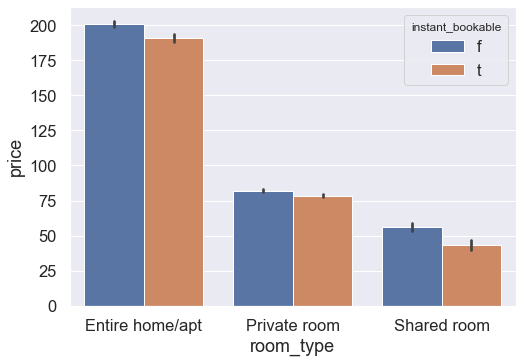

In [50]:
sns.set(font_scale=1.5)
sns.barplot(data=df,x='room_type',y='price',hue='instant_bookable')
plt.show()

#### Analysing logprice and room type and cancellation

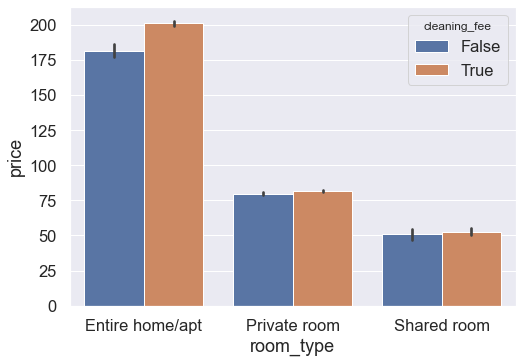

In [51]:
sns.set(font_scale=1.5)
sns.barplot(data=df,x='room_type',y='price',hue='cleaning_fee')
plt.show()

######## the inference made in home apt we have cleaning fee comparetively higher than the private room and shared room

# Analysing  price between diff price groups

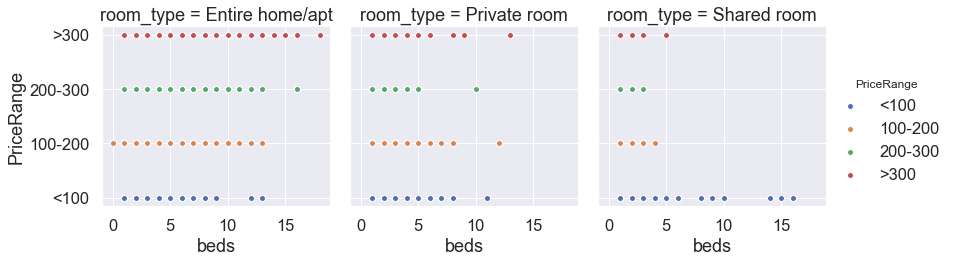

In [52]:
graph = sns.FacetGrid(df, col ="room_type",  hue ="PriceRange",height=4)
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "beds", "PriceRange", edgecolor ="w").add_legend()
# show the object
plt.show()

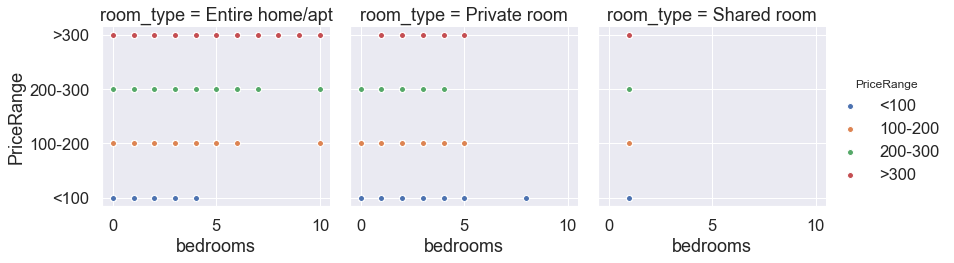

In [53]:
graph = sns.FacetGrid(df, col ="room_type",  hue ="PriceRange",height=4)
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "bedrooms", "PriceRange", edgecolor ="w").add_legend()
# show the object
plt.show()

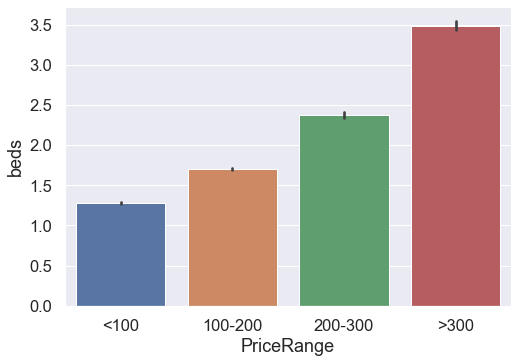

In [54]:
#plt.figure(figsize=(15,10))
#sns.set(font_scale=2)
sns.barplot(data=df,x='PriceRange',y='beds')
plt.show()

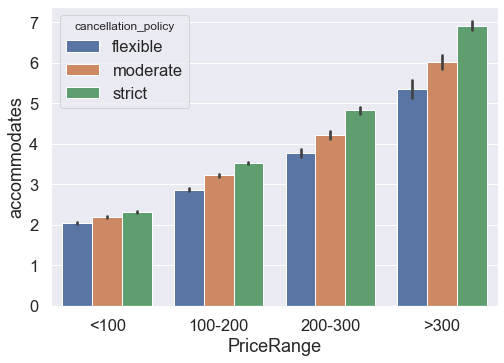

In [55]:
#plt.figure(figsize=(15,10))
#sns.set(font_scale=2)
sns.barplot(data=df,x='PriceRange',y='accommodates',hue='cancellation_policy')
plt.show()

# Data Pre processing

## Finding Unique value

In [56]:
df['room_type'].unique()

[Entire home/apt, Private room, Shared room]
Categories (3, object): [Entire home/apt, Private room, Shared room]

In [57]:
df['beds'].unique()

array([ 1.,  3.,  2.,  7.,  4.,  6.,  5.,  8., 16., 10.,  9., 13., 12.,
       15., 14., 11.,  0., 18.])

In [58]:
df['bedrooms'].unique()

array([ 1.,  3.,  0.,  2.,  4.,  5.,  7.,  6.,  8.,  9., 10.])

In [59]:
df['log_price'].unique()

array([5.01063529, 5.12989872, 4.97673374, 4.74493213, 4.44265126,
       4.41884061, 4.78749174, 3.58351894, 4.60517019, 5.29831737,
       4.95582706, 4.31748811, 4.59511985, 4.88280192, 4.38202663,
       3.68887945, 4.90527478, 4.00733319, 5.00394631, 4.55387689,
       5.19295685, 4.65396035, 5.22035583, 4.82831374, 3.912023  ,
       4.68213123, 4.99721227, 5.78382518, 4.15888308, 6.62007321,
       4.77912349, 4.94875989, 5.85793315, 4.49980967, 4.69134788,
       3.80666249, 5.16478597, 4.70048037, 4.57471098, 4.09434456,
       4.8598124 , 5.08759633, 3.87120101, 5.56068163, 4.24849524,
       4.80402104, 4.92725369, 4.17438727, 6.1717006 , 6.55108033,
       5.29330482, 4.06044301, 4.48863637, 5.6347896 , 5.9375362 ,
       4.86753445, 5.0689042 , 4.12713438, 4.46590812, 3.4657359 ,
       4.96284463, 5.59842196, 3.49650756, 5.6167711 , 4.93447393,
       6.74523635, 3.55534806, 6.2146081 , 6.52795792, 5.54126354,
       5.08140437, 2.94443898, 4.39444916, 4.8978398 , 5.48063

In [60]:
df['review_scores_rating'].unique()

array([100.,  93.,  92.,  40.,  97.,  99.,  90.,  89.,  91.,  88.,  86.,
        72.,  98.,  95.,  96.,  84.,  80.,  94.,  87.,  85.,  70.,  60.,
        75.,  20.,  76.,  83.,  82.,  78.,  73.,  55.,  81.,  67.,  71.,
        77.,  79.,  47.,  74.,  68.,  66.,  63.,  50.,  53.,  65.,  64.,
        27.,  69.,  30.,  58.,  35.,  62.,  49.,  57.,  54.,  56.])

In [61]:
df['accommodates'].unique()

array([ 3.,  7.,  5.,  2.,  4.,  6.,  8.,  1.,  9., 10., 16., 11., 12.,
       14., 13., 15.])

In [62]:
df['instant_bookable'].unique()

[f, t]
Categories (2, object): [f, t]

In [63]:
df['cancellation_policy'].unique()

[strict, moderate, flexible]
Categories (3, object): [strict, moderate, flexible]

In [64]:
df.isnull().sum()

id                      0
room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
price                   0
PriceRange              0
dtype: int64

## Fixing the special character in room type column

In [65]:
df['room_type'] = [x.replace('/', '') for x in df['room_type']] 

In [66]:
df['room_type'].unique()

array(['Entire homeapt', 'Private room', 'Shared room'], dtype=object)

# Outlier treatment

In [67]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

## Treating Outlier

In [68]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)

## Graph display after  outlier treatment 

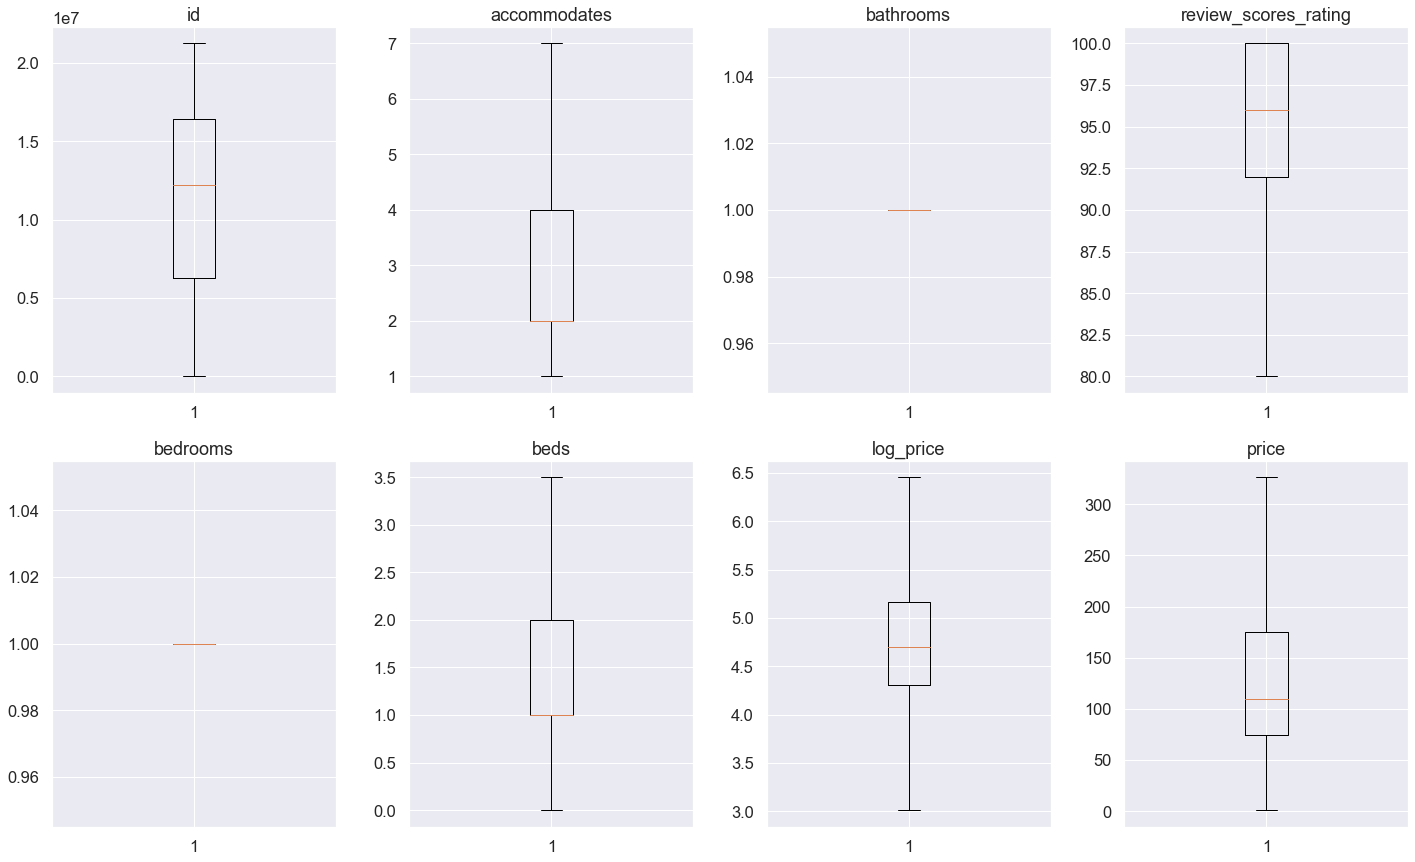

In [69]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

# Build Model

## Defining X,Y Variables

In [70]:
df.shape


(57119, 13)

In [71]:
#Defining X and y variables
X = df.drop(['price'], axis=1)
y = df[['price']]

In [72]:
X = pd.get_dummies(X, columns=['room_type', 'cancellation_policy','instant_bookable','cleaning_fee','PriceRange',], drop_first=True)
#X = pd.get_dummies(X, columns=['Seats', 'Owner_Type'], drop_first=True)
X.head()

id  accommodates  bathrooms  review_scores_rating  bedrooms  beds  \
0   6901257           3.0        1.0                 100.0       1.0   1.0   
1   6304928           7.0        1.0                  93.0       1.0   3.0   
2   7919400           5.0        1.0                  92.0       1.0   3.0   
4   3808709           2.0        1.0                  80.0       1.0   1.0   
5  12422935           2.0        1.0                 100.0       1.0   1.0   

   log_price  room_type_Private room  room_type_Shared room  \
0   5.010635                       0                      0   
1   5.129899                       0                      0   
2   4.976734                       0                      0   
4   4.744932                       0                      0   
5   4.442651                       1                      0   

   cancellation_policy_moderate  cancellation_policy_strict  \
0                             0                           1   
1                             0                           1   
2                             1                           0   
4                             1                           0   
5                             0                           1   

   instant_bookable_t  cleaning_fee_True  PriceRange_100-200  \
0                   0                  1                   1   
1                   1                  1                   1   
2                   1                  1                   1   
4                   1                  1                   1   
5                   1                  1                   0   

   PriceRange_200-300  PriceRange_>300  
0                   0                0  
1                   0                0  
2                   0                0  
4                   0                0  
5                   0                0

In [73]:
print(X.shape)
print(y.shape)

(57119, 16)
(57119, 1)


## Splitting and training data

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

## Fitting Linear model

In [75]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test) 

Intercept of the linear equation: [-260.27609805]

COefficients of the equation are: [[ 8.44851628e-09  3.11847753e-01 -2.13162821e-14 -1.33318569e-02
   7.10542736e-15  1.36985591e+00  7.83677070e+01 -1.06502713e+00
   1.11117597e+01  2.90893260e-02  1.32201772e+00  6.69806527e-02
  -5.54788689e-02  1.25016993e+01  6.64409705e+01  1.03392865e+02]]


In [76]:
X_train.shape

(38269, 16)

## Model Performances info

In [77]:
# Mean Absolute Error on test
mean_absolute_error(y_test, pred)

9.230656535637364

In [78]:
# RMSE on test data
mean_squared_error(y_test, pred)**0.5

12.364619067837864

In [79]:
# R-squared on test
r2_score(y_test, pred)

0.9768473453505934

In [80]:
# Training Score

linearregression.score(X_train, y_train)  

0.9771441371204598

In [81]:
# Testing score

linearregression.score(X_test, y_test) # unseen data

0.9768473453505934

## interpretation of the result

9.1  Interpreting the Regression Results:
Adjusted. R-squared: It reflects the fit of the model.

R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
In our case, the value for Adj. R-squared is 0.98, which is good!

const coefficient is the Y-intercept.

It means that if all the dependent variables (features: like beds, bedrooms, instant_bookable and so on..) coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
In our case, the value for const coeff is -260.276

Schooling coeff: It represents the change in the output Y due to a change of one unit in the Schooling (everything else held constant).

std err: It reflects the level of accuracy of the coefficients.

The lower it is, the higher is the level of accuracy.
P >|t|: It is p-value.

Pr(>|t|) : For each independent feature there is a null hypothesis and alternate hypothesis

Ho : Independent feature is not significant

Ha : Independent feature is that it is significant

Pr(>|t|) gives P-value for each independent feature to check that null hypothesis. we are considering 0.05 (5%) as significance level

A p-value of less than 0.05 is considered to be statistically significant.
Confidence Interval: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

## Test For Multicollinearity

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent.  If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.

* There are different ways of detecting(or  testing) multi-collinearity, one such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression parameter estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βkis “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

id                              1.000183
accommodates                    4.291756
bathrooms                       0.000000
review_scores_rating            1.037668
bedrooms                        0.000000
beds                            3.532332
log_price                       7.386277
room_type_Private room          1.999690
room_type_Shared room           1.292618
cancellation_policy_moderate    1.695470
cancellation_policy_strict      1.809467
instant_bookable_t              1.023876
cleaning_fee_True               1.129113
PriceRange_100-200              3.217033
PriceRange_200-300              3.690996
PriceRange_>300                 5.120548
dtype: float64



In the above case as we have  high VIF  with Price range >300 and logprice and accomadates which is the sign of multicolinearity

In [83]:
olsmod1 = sm.OLS(y_train, X_train)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.168e+05
Date:                Tue, 18 May 2021   Prob (F-statistic):               0.00
Time:                        21:33:37   Log-Likelihood:            -1.5044e+05
No. Observations:               38269   AIC:                         3.009e+05
Df Residuals:                   38254   BIC:                         3.010e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
id              

In [84]:
X_train1 = X_train.drop(['id','instant_bookable_t','cleaning_fee_True','review_scores_rating'], axis=1)


In [85]:
olsmod1 = sm.OLS(y_train, X_train1)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.636e+05
Date:                Tue, 18 May 2021   Prob (F-statistic):               0.00
Time:                        21:33:37   Log-Likelihood:            -1.5044e+05
No. Observations:               38269   AIC:                         3.009e+05
Df Residuals:                   38258   BIC:                         3.010e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
accommodates    

In [86]:
X_train2=X_train1.drop(['cancellation_policy_moderate'], axis=1)



In [87]:
olsmod2 = sm.OLS(y_train, X_train2)
olsres2 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.636e+05
Date:                Tue, 18 May 2021   Prob (F-statistic):               0.00
Time:                        21:33:37   Log-Likelihood:            -1.5044e+05
No. Observations:               38269   AIC:                         3.009e+05
Df Residuals:                   38258   BIC:                         3.010e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
accommodates    

## Mean of residuals should be 0 or close to 0

In [88]:
residual= olsres2.resid
np.mean(residual)

-4.497349879570488e-14

# Test Linearity

In [89]:
residual=olsres2.resid
fitted=olsres2.fittedvalues

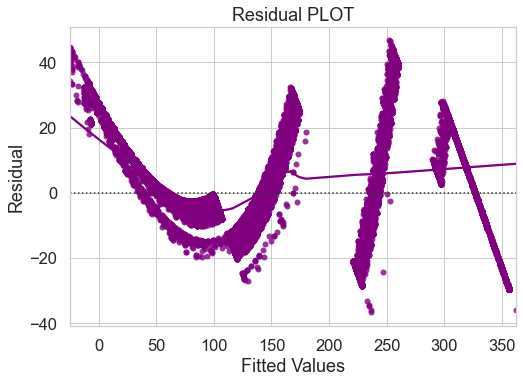

In [90]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

# Test Normality

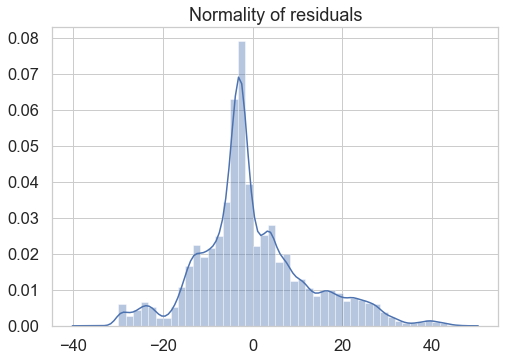

In [91]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

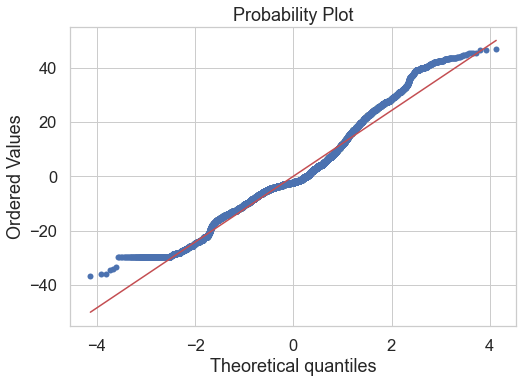

In [92]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

The points in the probability plot follow the line well.
The normal distribution appears to be a good fit to the data.

In [93]:
stats.shapiro(residual)#the null hypothesisfor shaprio-test isthe a variable is normally distributed

ShapiroResult(statistic=0.9638143181800842, pvalue=0.0)

In [94]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train2)
lzip(name, test)

[('F statistic', 0.9826748831666599), ('p-value', 0.8865594472666015)]

# Predicting on test data

In [95]:
X_train2.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'log_price',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_strict', 'PriceRange_100-200',
       'PriceRange_200-300', 'PriceRange_>300'],
      dtype='object')

In [96]:
X_test_final = X_test[X_train2.columns]

In [97]:
X_test_final.shape

(18850, 11)

In [98]:
y_pred = olsres2.predict(X_test_final)

ValueError: shapes (18850,11) and (12,) not aligned: 11 (dim 1) != 12 (dim 0)

##  Checking the performance on train and test: metric used - RMSE

In [ ]:
#Checking root mean squared error on both train and test set  

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train, fitted))
print('Train error:',rms)

rms1 = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test error:',rms1)

It seems to be  low test and train error so i assume the model  is not overfitting 

In [ ]:
olsmod2 = sm.OLS(y_train, X_train2)
olsres2 = olsmod2.fit()
print(olsres2.summary())